In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#here without using encoding="latin-1" it shows error because some of the datas can't able to read.not in utf-8 format
df=pd.read_csv("C:\codsoft\Movie Rating Prediction\IMDb Movies India.csv",encoding='latin-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
#drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.shape

(15503, 10)

In [11]:
df.nunique()


Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

# IMPUTATION WITH MEAN AND MODE

In [12]:
cat = list(df.columns[df.dtypes=='object'])

In [13]:
mn = df['Rating'].mean()
df['Rating'].fillna(mn,inplace=True)

In [14]:
df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating         0
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [15]:
for i in cat:
    m = df[i].mode()[0]
    df[i].fillna(m,inplace=True)

In [16]:
df.isna().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
print(df['Votes'].dtypes)

object


In [18]:
#convert string into int "year" and "votes"
df['Year']= df['Year'].str.strip('()').astype(int)
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].str.replace('.','')
df['Votes'] = df['Votes'].str.strip('$')
df['Votes'] = df['Votes'].str.strip('M')
df['Votes'] = df['Votes'].astype(int)

# DATA VISUALIZATION


In [19]:
genre = df['Genre']
genre_stack = genre.str.split(',').apply(pd.Series).stack()
genre_stack.index = genre_stack.index.droplevel(-1)
g=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]
# g_dict = {}
# for dic in g:
#     for k,v in dic.items():
#         if k in g_dict:
#             g_dict[k]+=v
#         else:
#             g_dict[k]=v
# below code does same job as above
g_dict = {k: sum(dic.get(k,0) for dic in g) for dic in g for k in dic}
genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
# Now for average rating of each genre
# genre_rating = {}
# for i in genres_count.index:
#     genre_rating[i]=df.loc[df['Genre'].str.contains(i),'Rating'].mean().round(1)
genre_rating = {k:df.loc[df['Genre'].str.contains(k),'Rating'].mean().round(1) for k in genres_count.index}
genre_rating = pd.Series(genre_rating).sort_values(ascending=False)
genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie count',1:'Average rating'})
genres_single.sort_values(by='Movie count',ascending=False,inplace=True)

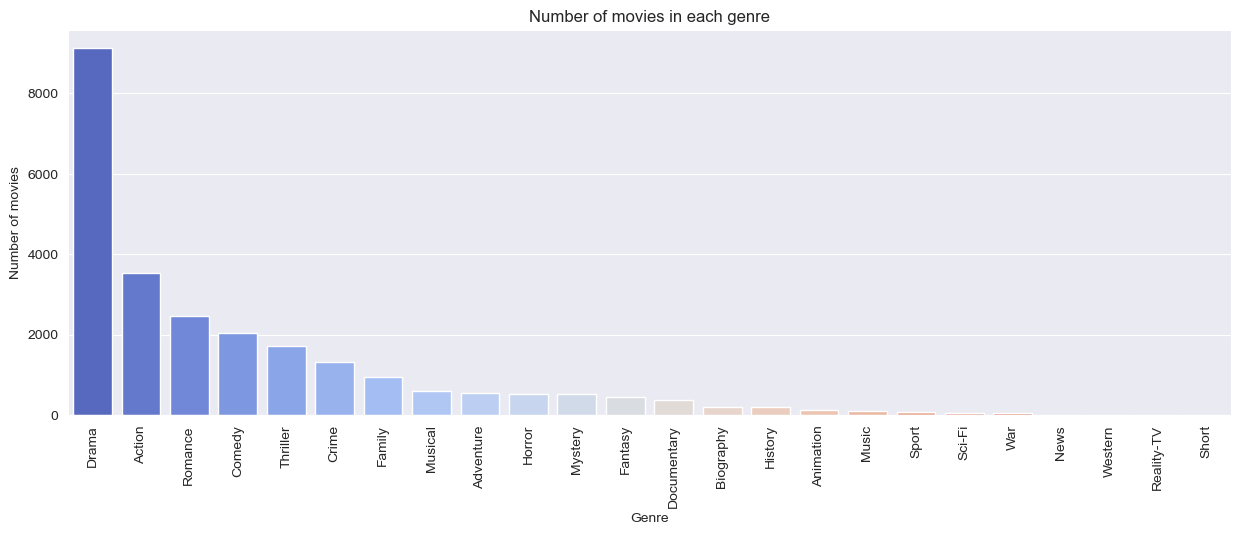

In [20]:
# genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=genres_single,x=genres_single.index.values,y='Movie count',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies in each genre')
plt.xticks(rotation=90)
plt.show()

The most of the movies are Drama,Action and followed by Romance

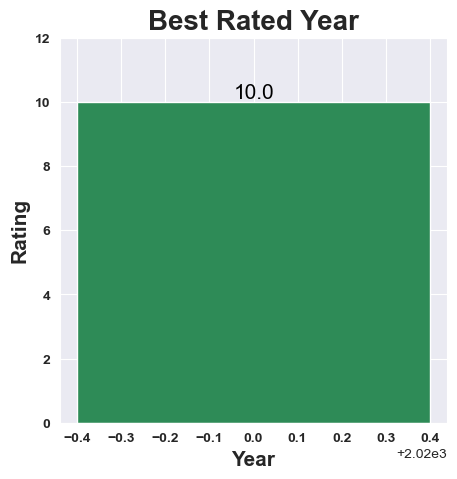

In [21]:
#sorting the Year and Rating by Rating then selecting the top one
best_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)


#Plotting Bar Graph
fig=plt.figure(figsize=(5,5))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='seagreen')

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Best Rated Year",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting the labels for Bars for better visualization
for ele in bars:
    plt.text(ele.get_x()+(ele.get_width()/2),ele.get_y()+ele.get_height(),ele.get_height(),color='black',ha='center',
             va='bottom',fontsize=15)



Year 2020 an Indian movie recieved 10.0 points

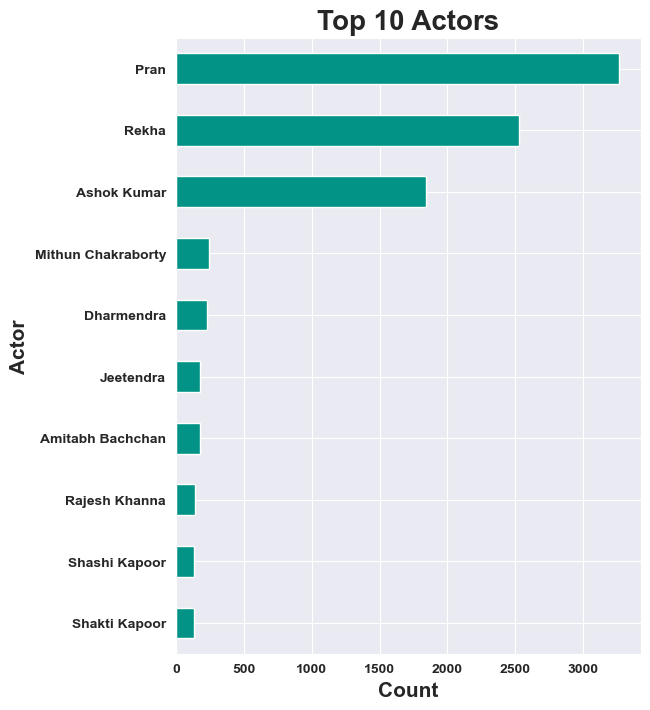

In [22]:
#Top 10 Actors Who appears in most of the movies
#Making Series for the all the columns of Actors
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']

#Concatinating the series in one series
Actors = pd.concat([Actor1,Actor2,Actor3])

#sorting series by counts then selecting top 10
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

#Plotting Bar graph
frequent_actor.sort_values().plot(kind='barh',color='#029386',figsize=(6,8))

plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Actor',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


pran appears in most of the movies

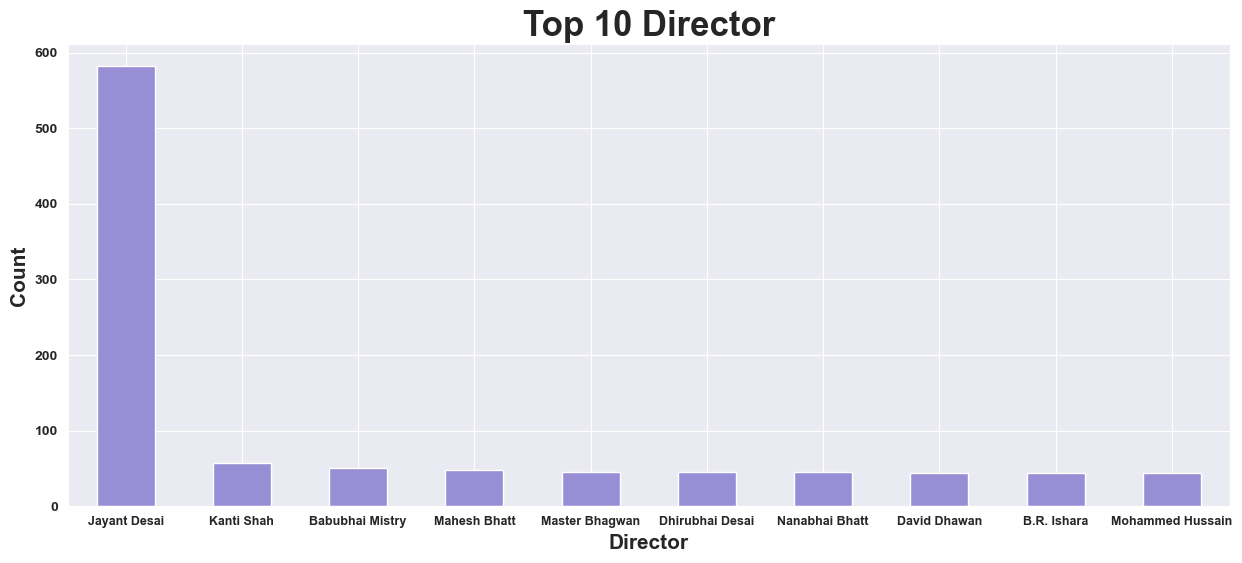

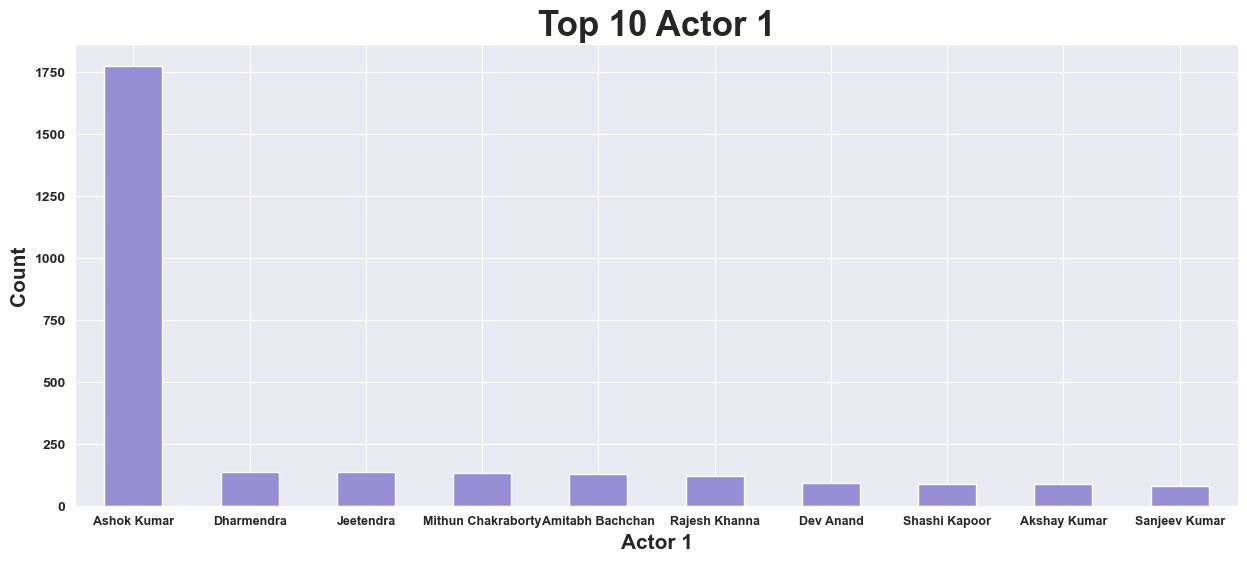

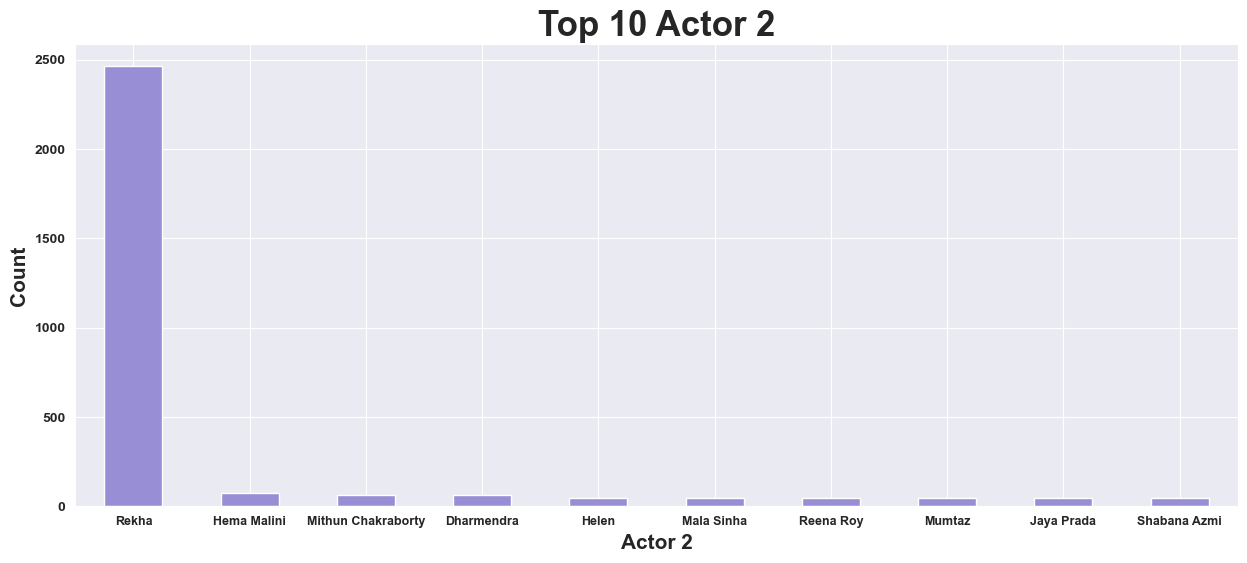

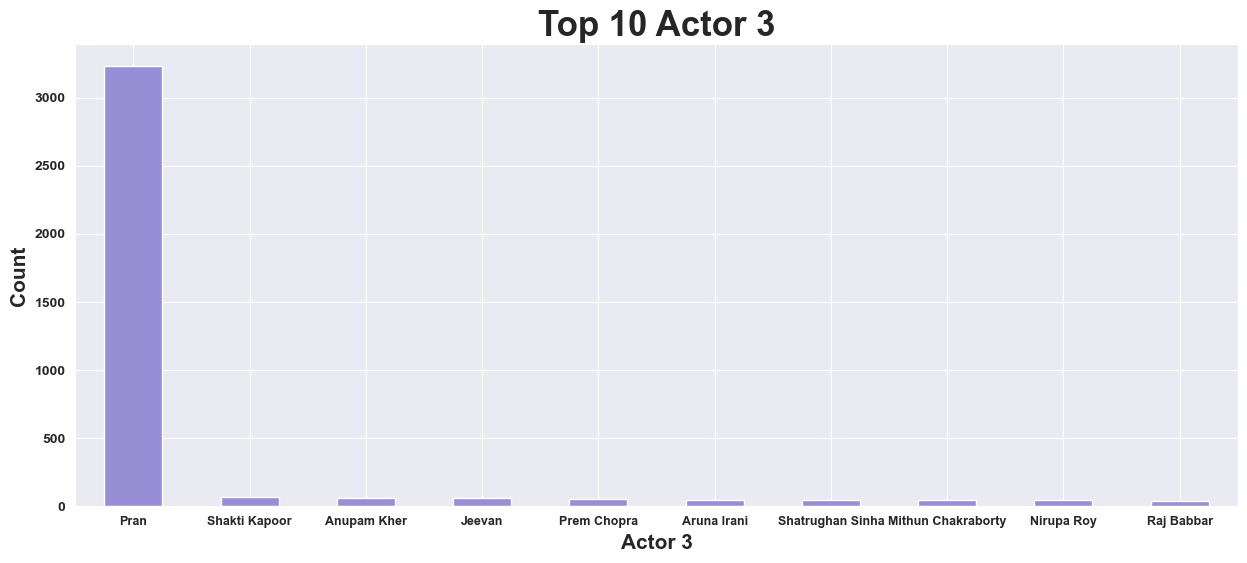

In [23]:
#Creating a Function for plotting graphs 
def top10(dframe, column):
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                            figsize=(15,6),color='#988ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=9,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

#Looping the columns then calling the function to plot graph
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(df, items)


In [24]:
#here dropping movie names and duration column because it doesn't act as imp for our prediction
df=df.drop(columns=["Name","Duration"])
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
df.columns

Index(['Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2',
       'Actor 3'],
      dtype='object')

# Target Encoding

In [26]:

# performing mean encoding
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Year,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,2019,5.8,6.0,5.8,5.8,5.8,5.5,5.8
1,2019,7.0,6.0,5.8,7.0,6.8,7.0,7.0
2,2021,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,5.8,6.0,5.8,6.3,6.8,5.8,5.5


In [27]:
#Correlation
corr_df = df.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating              1.000000
Director encoded    0.736431
Actor 3 encoded     0.684941
Actor 2 encoded     0.682479
Actor 1 encoded     0.679122
Votes encoded       0.551895
Genre encoded       0.334980
Year               -0.090641
Name: Rating, dtype: float64

<Axes: >

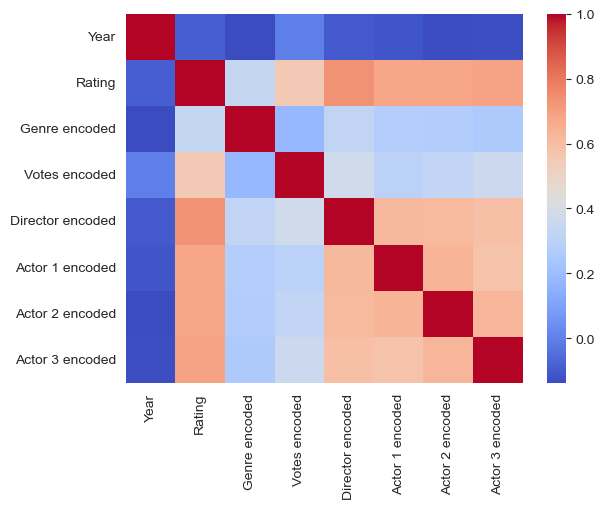

In [28]:
sns.heatmap(corr_df,annot=False,cmap='coolwarm')

The correlation plot indicate that the director, specific actors, and number of votes have a strong positive relationship with higher movie ratings, while the genre has a weaker positive correlation, and the year of release has a negligible negative correlation.



# split the data

In [29]:

X = df.drop(columns='Rating')
Y =df[['Rating']]

In [30]:
X.head()

,Year,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,2019,6.0,5.8,5.8,5.8,5.5,5.8
1,2019,6.0,5.8,7.0,6.8,7.0,7.0
2,2021,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,6.0,5.8,6.3,6.8,5.8,5.5


In [31]:
Y.head()

,Rating
0,5.8
1,7.0
2,5.8
3,4.4
4,5.8


In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20,random_state=45)

# Model Building

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [34]:
dct = {
    'Linear':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR()
}

In [35]:
dct.items()

dict_items([('Linear', LinearRegression()), ('DecisionTree', DecisionTreeRegressor()), ('RandomForest', RandomForestRegressor()), ('GradientBoosting', GradientBoostingRegressor()), ('KNN', KNeighborsRegressor()), ('SVR', SVR())])

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []


for name,model in dct.items():
    # fit the model
    m = model.fit(xtrain,ytrain)
    ypred_train = m.predict(xtrain)
    ypred_test = m.predict(xtest)
    # calculate MSE
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    # caluclate R2
    r2_train = (r2_score(ytrain,ypred_train))*100
    r2_test = (r2_score(ytest,ypred_test))*100
  

    # add these values to the respective list to compare the output
    train_mse.append(mse_train)
    train_r2.append(r2_train)
    test_mse.append(mse_test)
    test_r2.append(r2_test)
   

    # print the results
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print("===============================")

Scores for Linear
Training Scores
MSE:[0.24531847799073211]
R2:[74.79881362121868]
Testing Scores
MSE:[0.25099640127545564]
R2:[74.45782377297292]
Scores for DecisionTree
Training Scores
MSE:[0.24531847799073211, 0.00019728000860076329]
R2:[74.79881362121868, 99.97973373100031]
Testing Scores
MSE:[0.25099640127545564, 0.4042348346411552]
R2:[74.45782377297292, 58.86380310219531]


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Scores for RandomForest
Training Scores
MSE:[0.24531847799073211, 0.00019728000860076329, 0.027984998157948693]
R2:[74.79881362121868, 99.97973373100031, 97.12514458688692]
Testing Scores
MSE:[0.25099640127545564, 0.4042348346411552, 0.19399634181236516]
R2:[74.45782377297292, 58.86380310219531, 80.25832751071175]


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Scores for GradientBoosting
Training Scores
MSE:[0.24531847799073211, 0.00019728000860076329, 0.027984998157948693, 0.19007215177095296]
R2:[74.79881362121868, 99.97973373100031, 97.12514458688692, 80.47418294199282]
Testing Scores
MSE:[0.25099640127545564, 0.4042348346411552, 0.19399634181236516, 0.21026329168753097]
R2:[74.45782377297292, 58.86380310219531, 80.25832751071175, 78.60295198231238]
Scores for KNN
Training Scores
MSE:[0.24531847799073211, 0.00019728000860076329, 0.027984998157948693, 0.19007215177095296, 0.17733201096597323]
R2:[74.79881362121868, 99.97973373100031, 97.12514458688692, 80.47418294199282, 81.78295782739033]
Testing Scores
MSE:[0.25099640127545564, 0.4042348346411552, 0.19399634181236516, 0.21026329168753097, 0.2846245727184779]
R2:[74.45782377297292, 58.86380310219531, 80.25832751071175, 78.60295198231238, 71.03571621754341]


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Scores for SVR
Training Scores
MSE:[0.24531847799073211, 0.00019728000860076329, 0.027984998157948693, 0.19007215177095296, 0.17733201096597323, 0.9700293396605114]
R2:[74.79881362121868, 99.97973373100031, 97.12514458688692, 80.47418294199282, 81.78295782739033, 0.35039193992451034]
Testing Scores
MSE:[0.25099640127545564, 0.4042348346411552, 0.19399634181236516, 0.21026329168753097, 0.2846245727184779, 0.9744958015449632]
R2:[74.45782377297292, 58.86380310219531, 80.25832751071175, 78.60295198231238, 71.03571621754341, 0.8322694306555078]


In [38]:
res = {'Name':list(dct.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,}

In [39]:
df_res = pd.DataFrame(res)
df_res


,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores
0,Linear,0.245318,0.250996,74.798814,74.457824
1,DecisionTree,0.000197,0.404235,99.979734,58.863803
2,RandomForest,0.027985,0.193996,97.125145,80.258328
3,GradientBoosting,0.190072,0.210263,80.474183,78.602952
4,KNN,0.177332,0.284625,81.782958,71.035716
5,SVR,0.970029,0.974496,0.350392,0.832269


In [40]:
#Random forest perform well with 80% of accuracy

# Evaluation Metrics

In [41]:



from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
def eval_model(model,xtrain,ytrain):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the scores
    ypred_test = model.predict(xtest)
    # Calculate MSE,RMSE,MAE,R2 scores
    mse = mean_squared_error(ytest,ypred_test)
    rmse = mse**(1/2)
    mae = mean_absolute_error(ytest,ypred_test)
    r2 = r2_score(ytest,ypred_test)
    return mse,rmse,mae,r2

In [43]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor(),SVR()]

# Evaluate the models
for model in models:
    print(f"Model: {model.__class__.__name__}")
    mse, rmse, mae, r2 = eval_model(model, xtrain, ytrain)
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R^2: {r2:.3f}")
    print("----------------------------")

Model: LinearRegression
MSE: 0.251
RMSE: 0.501
MAE: 0.331
R^2: 0.745
----------------------------
Model: DecisionTreeRegressor
MSE: 0.423
RMSE: 0.650
MAE: 0.332
R^2: 0.570
----------------------------
Model: RandomForestRegressor


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE: 0.196
RMSE: 0.443
MAE: 0.237
R^2: 0.801
----------------------------
Model: GradientBoostingRegressor


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


MSE: 0.210
RMSE: 0.458
MAE: 0.283
R^2: 0.786
----------------------------
Model: KNeighborsRegressor
MSE: 0.285
RMSE: 0.534
MAE: 0.310
R^2: 0.710
----------------------------
Model: SVR


C:\Users\djeev\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 0.974
RMSE: 0.987
MAE: 0.626
R^2: 0.008
----------------------------


# conclusion

1.The most of the movies are Drama,Action and followed by Romance

2. Year 2020 an Indian movie recieved 10.0 points

3. pran appears in most of the movies

4. The correlation plot indicate that the director, specific actors, and number of votes have a strong positive relationship with higher movie ratings, while the genre has a weaker positive correlation, and the year of release has a negligible negative correlation.

5. Random Forest performs well with 80% of accuracy

6.In Evaluation Metrics compare to other model Random Forest perform with low error MSE: 0.196, RMSE: 0.443, MAE: 0.237